## Observations and Insights 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [90]:
# Checking the number of mice.
mice = merge_df['Mouse ID'].nunique()
mice_pd = pd.DataFrame({'Unique Mice': [mice]})
mice_pd

,Unique Mice
0,249


In [91]:
# Create a clean data frame by dropping the duplicate mice by its ID and Timepoint
cleaned_df = merge_df.drop_duplicates(['Mouse ID','Timepoint'])

# Checking the number of mice in the un-clean DataFrame.
all_lines = merge_df['Mouse ID'].count()

# Checking the number of mice in the clean DataFrame.
unique_lines = cleaned_df['Mouse ID'].count()

# Preview the points of the cleaned and uncleaned data lines
unique_lines_pd = pd.DataFrame({'Unique Data Points': [unique_lines], 'All Data Points': [all_lines]})
unique_lines_pd

,Unique Data Points,All Data Points
0,1888,1893


## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Summarize Tumor Volume Stats by Drug Regimen
tv_mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tv_median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tv_variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tv_stdev = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tv_sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Creating a DataFrame to store each stat
tv_stats_summary = pd.DataFrame({'Tumor Volume - Mean': tv_mean,
                                  'Tumor Volume - Median': tv_median, 
                                  'Tumor Volume - Variance': tv_variance,
                                  'Tumor Volume - Standard Deviation': tv_stdev,
                                   'Tumor Volume - Standard Error Measure': tv_sem})
tv_stats_summary


# Check to make sure all regimens are included in df - 10 total regimens
# total_regimens = cleaned_df['Drug Regimen'].nunique()
# total_regimens 

,Tumor Volume - Mean,Tumor Volume - Median,Tumor Volume - Variance,Tumor Volume - Standard Deviation,Tumor Volume - Standard Error Measure
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

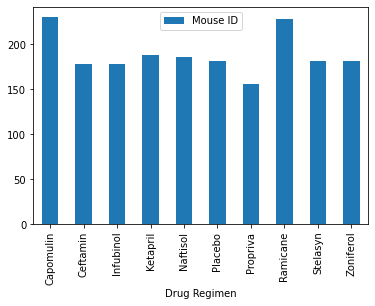

In [98]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Dataframe for the plot
mice_by_regimen = pd.DataFrame(cleaned_df.groupby('Drug Regimen')['Mouse ID'].count())
mice_by_regimen.plot.bar()

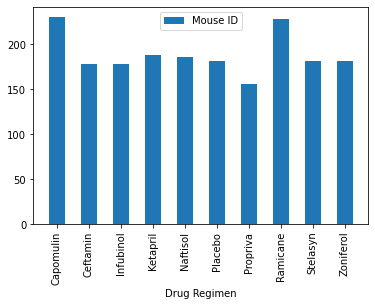

In [120]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = mice_by_regimen.index.tolist()
y_axis = mice_by_regimen['Mouse ID'].tolist()

plt.bar(x_axis, y_axis, width=.5)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.legend(['Mouse ID'], loc = 'upper center')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAA52D4240>],
      dtype=object)

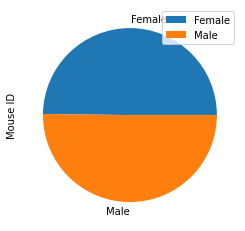

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_by_sex = pd.DataFrame(mouse_metadata.groupby('Sex')['Mouse ID'].count())
mice_by_sex.plot.pie(subplots = True)


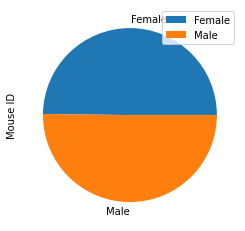

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = mice_by_sex.index.tolist()
sex = mice_by_sex['Mouse ID'].tolist()

plt.pie(sex, labels=x_axis)
plt.xticks(rotation=90)
plt.ylabel('Mouse ID')
plt.legend()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
